In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_table('fruit_data_with_colors.txt')

In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
df.shape

(59, 7)

In [5]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [6]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [7]:
print(df.isnull().sum())

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64


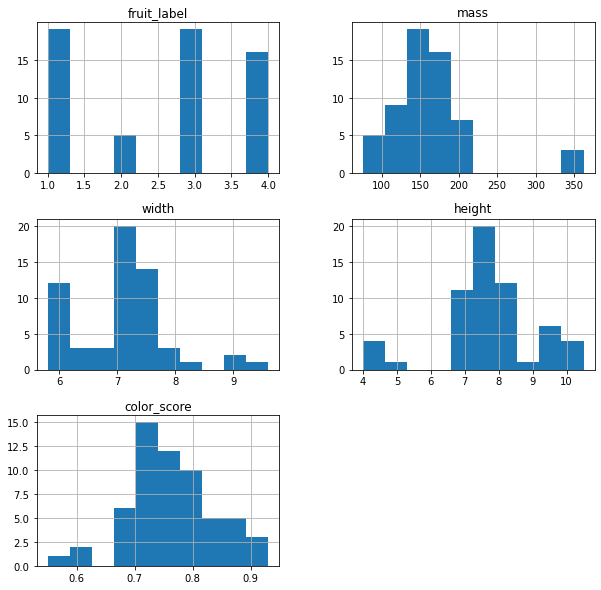

In [8]:
p = df.hist(figsize = (10,10))

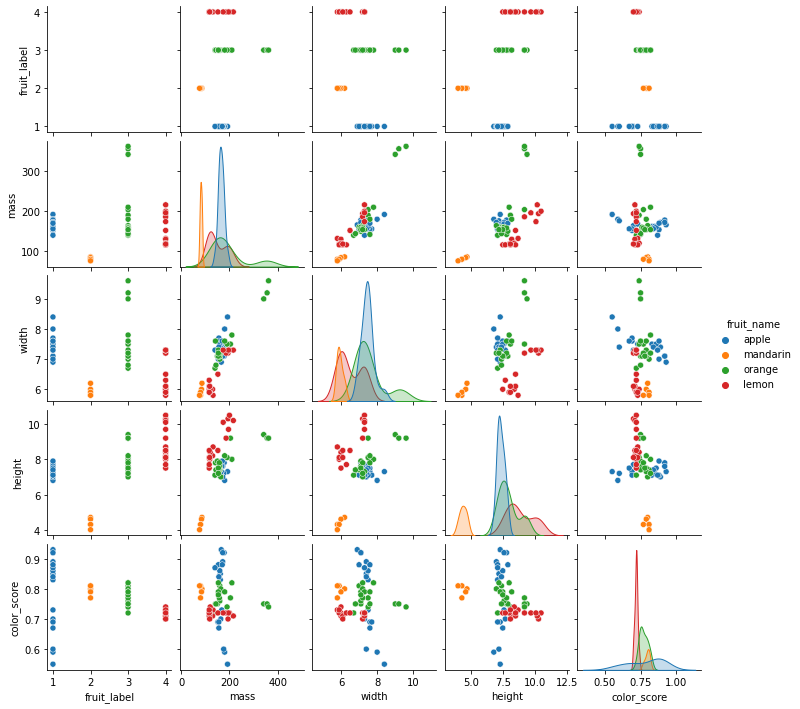

In [9]:
sns.pairplot(df,hue='fruit_name',size=2)

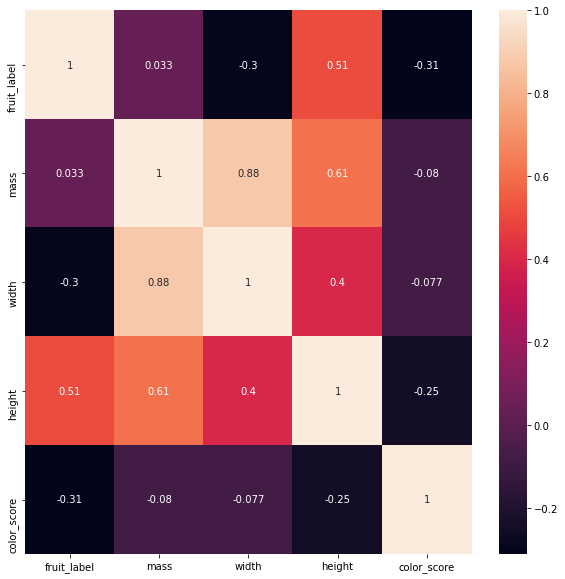

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [11]:
df.corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [12]:
apple_data=df[df['fruit_name']=='apple']
orange_data=df[df['fruit_name']=='orange']
lemon_data=df[df['fruit_name']=='lemon']
mandarin_data=df[df['fruit_name']=='mandarin']

In [13]:
apple_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [14]:
lemon_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
43,4,lemon,spanish_belsan,194,7.2,10.3,0.70
44,4,lemon,spanish_belsan,200,7.3,10.5,0.72
45,4,lemon,spanish_belsan,186,7.2,9.2,0.72
46,4,lemon,spanish_belsan,216,7.3,10.2,0.71
47,4,lemon,spanish_belsan,196,7.3,9.7,0.72


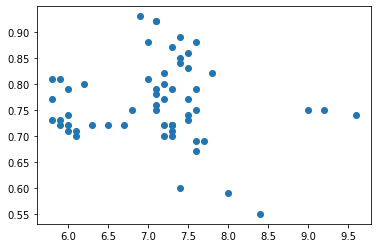

In [15]:
plt.scatter(df['width'],df['color_score'])

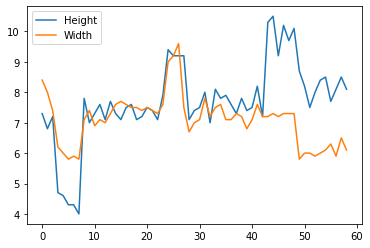

In [16]:
plt.plot(df['height'],label='Height')
plt.plot(df['width'],label='Width')
plt.legend()

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
X=df[['mass', 'width', 'height' , 'color_score']]
Y=df['fruit_label']

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1/3,random_state=0, stratify=Y)

In [22]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [23]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [24]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 60.0 % and k = [1, 2, 4]


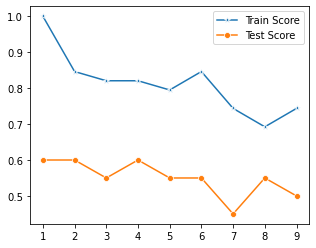

In [25]:
plt.figure(figsize=(5,4))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

In [28]:
knn = KNeighborsClassifier(1)

knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.6

Text(0.5, 15.0, 'Predicted label')

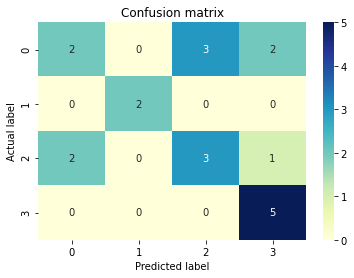

In [30]:
Y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', Y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.50      0.29      0.36         7
           2       1.00      1.00      1.00         2
           3       0.50      0.50      0.50         6
           4       0.62      1.00      0.77         5

    accuracy                           0.60        20
   macro avg       0.66      0.70      0.66        20
weighted avg       0.58      0.60      0.57        20



In [32]:
knn.score(X_test, Y_test)

0.6

In [33]:
predct = dict(zip(df.fruit_label.unique(), df.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [39]:
prediction2=knn.predict([['12','72','85', '0.90']])
predct[prediction2[0]]

'mandarin'

In [38]:
prediction2=knn.predict([['400','7','85', '76']])
predct[prediction2[0]]

'orange'

In [40]:
accuracies = {}

In [41]:
from sklearn.svm import SVC

In [42]:
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)
acc = svm.score(X_test,Y_test)*100
accuracies['SVM'] = acc

In [43]:
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 40.00%


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

acc = dtc.score(X_test, Y_test)*100
accuracies['Decision Tree'] = acc

In [47]:
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 75.00%


In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

acc = nb.score(X_test,Y_test)*100
accuracies['Naive Bayes'] = acc

In [53]:
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 80.00%


In [54]:
from sklearn.ensemble import RandomForestClassifier

Random Forest Algorithm Accuracy Score : 95.00%


In [55]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, Y_train)

acc = rf.score(X_test,Y_test.T)*100
accuracies['Random Forest'] = acc

In [56]:
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 95.00%


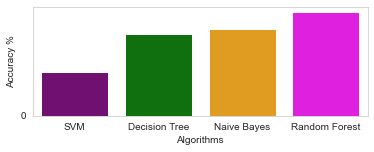

In [61]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(6,2))
plt.yticks(np.arange(0,10,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()